# Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\user\AppData\Local\Temp\ipykernel_33132\1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Splitting Independent And Dependent Variable

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1]

Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Training And Test Data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Training The Model

In [7]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Predict 

In [8]:
y_pred = forest.predict(X_test)

# Evaluating Model

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
print(accuracy_score(y_test, y_pred))

0.92


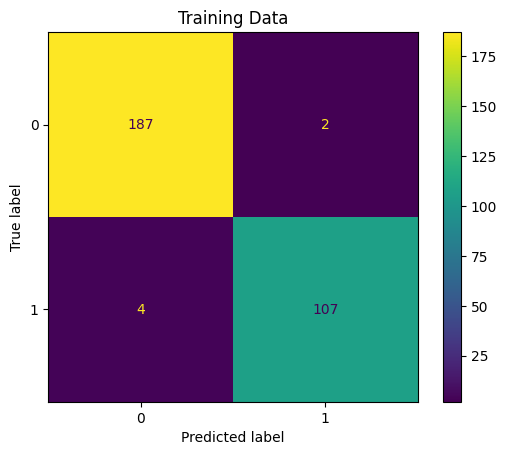

In [10]:
ConfusionMatrixDisplay.from_estimator(forest, X_train, y_train)
plt.title('Training Data')
plt.show()

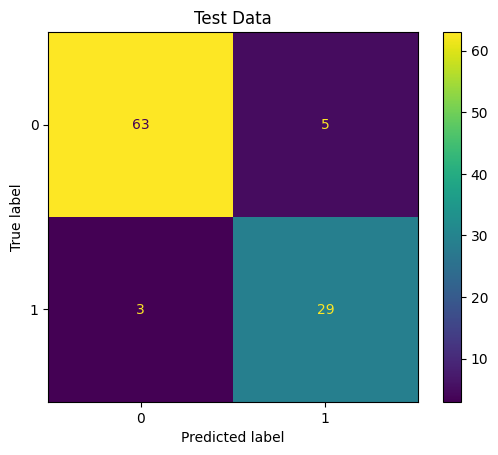

In [11]:
ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test)
plt.title('Test Data')
plt.show()

# Plot

<Axes: >

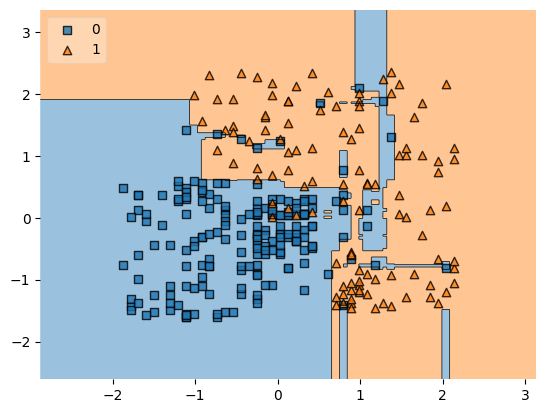

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, np.array(y_train), clf=forest, legend=2)